# Importing the required packages

In [57]:
import requests
from bs4 import BeautifulSoup
import urllib.request
from contextlib import closing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from selenium import webdriver
from itertools import chain

### url which has to be used for scraping

In [58]:
#url = 'https://mvgee.com/home'
url = 'https://gogoanime.in'

### the function to retrieve the text content of the webpage

In [59]:
def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None
    """
    try:
        with closing(requests.get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content
            else:
                return None

    except requests.RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns true if the response seems to be HTML, false otherwise
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)

In [60]:
#page is a requests object which holds the downloaded html page
page = simple_get(url)
#print(page)

In [61]:
#creating the BeautifulSoup object
soup = BeautifulSoup(page, 'html.parser')

### checking the ongoing tv series.

In [62]:
# retrieving the ongoing series name and link in the right side menu...

#reading the content of the division tag where the links of ongoing series are available
ongoingseries = soup.find_all('div', class_="overview")

#reading all the links in a list object from the division bs4.object.Tag ongoingseries
links= list(chain.from_iterable([n.find_all('a') for n in ongoingseries]))

#creating a dataframe to store all the ongoing series with name and url link
ongoingseries_df = pd.DataFrame(data=None, columns=['TVseriesName', 'Link'],index=None)

#using for loop to extract all the urls and tv series name and storing it 1 by 1 into the dataframe
for link in links:
    ongoingseries_df = ongoingseries_df.append({'TVseriesName': link.get_text(), 'Link': url+link.get('href')}, ignore_index=True)

#printing the first five values in the dataframe to check if it stored properly or  not
ongoingseries_df.head()

,TVseriesName,Link
0,3D Kanojo: Real Girl,https://gogoanime.in/category/3d-kanojo-real-girl
1,Aikatsu Friends!,https://gogoanime.in/category/aikatsu-friends
2,Aishen Qiaokeli-ing... 2nd Season,https://gogoanime.in/category/aishen-qiaokeli-...
3,Akkun to Kanojo,https://gogoanime.in/category/akkun-to-kanojo
4,Alice or Alice: Siscon Niisan to Futago no Imouto,https://gogoanime.in/category/alice-or-alice-s...


### Checking the recently added tv series

In [63]:
#reading the content of the division tag where the links of ongoing series are available
recentlyAddedSeries = soup.find_all('div', class_="added_series_body final")

#reading all the links in a list object from the division bs4.object.Tag ongoingseries
links= list(chain.from_iterable([n.find_all('a') for n in recentlyAddedSeries]))

#creating a dataframe to store all the ongoing series with name and url link
recentlyAddedSeries_df = pd.DataFrame(data=None, columns=['TVseriesName', 'Link'],index=None)

#using for loop to extract all the urls and tv series name and storing it 1 by 1 into the dataframe
for link in links:
    #print(link)
    recentlyAddedSeries_df = recentlyAddedSeries_df.append({'TVseriesName': link.get_text(), 'Link': url+link.get('href')}, ignore_index=True)

#printing the first five values in the dataframe to check if it stored properly or  not
recentlyAddedSeries_df.head()

,TVseriesName,Link
0,Uchuu Senkan Yamato 2202: Ai no Senshi-tachi,https://gogoanime.in/category/uchuu-senkan-yam...
1,Full Metal Panic! Invisible Victory (Dub),https://gogoanime.in/category/full-metal-panic...
2,Douluo Dalu - Soul Land,https://gogoanime.in/category/douluo-dalu-soul...
3,Yaoguai Mingdan Season 1,https://gogoanime.in/category/yaoguai-mingdan-...
4,Yaoguai Mingdan Season 2,https://gogoanime.in/category/yaoguai-mingdan-...


### now extracting all the anime tv series from link - https://gogoanime.in/anime-list.html
Note - to go to this url, click on anime list on top of the main page.

In [64]:
url = 'https://gogoanime.in/anime-list.html?page=1'

In [65]:
#page is a requests object which holds the downloaded html page
page = simple_get(url)
#print(page)

In [66]:
#creating the BeautifulSoup object
soup = BeautifulSoup(page, 'html.parser')

In [67]:
#print(soup.prettify())

In [68]:
#reading the content of the division tag where the links of ongoing series are available
animelist = soup.find_all('div', class_="anime_list_body")
#print(animelist)

#reading all the linklist in a list object from the division bs4.object.Tag animelist
linklist= list(chain.from_iterable([n.find_all('li') for n in animelist]))

trialsoup = BeautifulSoup(linklist[0].get('title'), "html.parser") 

# Genres of the anime tv series
print(trialsoup.find_all('p',class_='type')[0].get_text())
#finding link of the genres.
print(trialsoup.find_all('p',class_='type')[0].find_all('a')[0].get('href'))
# Released year of the anime tv series
print(trialsoup.find_all('p',class_='type')[1].get_text())

# Status of the anime tv series
print(trialsoup.find_all('p',class_='type')[2].get_text())
# Plot Summary of the anime tv series
print(trialsoup.find('p',class_='sumer').get_text())

Genre: Drama, School, Shounen Ai, Slice of Life
http://gogoanime.in/genre/drama
Released: 2006
Status:  Completed
Plot Summary:  Life goes on for the ladies in the Yamayurikai. On the one-year anniversary of Sachiko and Yumi becoming sisters, Yumi receives a difficult task from Sachiko: to finally acknowledge someone as her younger sister.
 


In [41]:
###checking pagination to extract data

#reading the content of the division tag where the links of ongoing series are available
pagination = soup.find_all('div', class_="anime_name_pagination")[0]

print(pagination.find_all('a')[0].get('href'))
pagination = pagination.find_all('a')

for page in pagination:
    #print(page)
    print('Link - ',page.get('href'))
    print('Data - ',page.get('data-page'))
    print('Text - ',page.get_text())

?page=1
Link -  ?page=1
Data -  1
Text -  1
Link -  ?page=2
Data -  2
Text -  2
Link -  ?page=3
Data -  3
Text -  3
Link -  ?page=4
Data -  4
Text -  4
Link -  ?page=5
Data -  5
Text -  5


In [100]:
def animeName(soupyHtml):
    return soupyHtml.find('a', class_='bigChar').get_text()

def animeLink(soupyHtml):
    return soupyHtml.find('a').get('href')

def animeGenre(soupyHtml):
    return soupyHtml.find_all('p',class_='type')[0].get_text().split(': ')[1]

def animeReleasedYear(soupyHtml):
    return soupyHtml.find_all('p',class_='type')[1].get_text().split(': ')[1]

def animeStatus(soupyHtml):
    return soupyHtml.find_all('p',class_='type')[2].get_text().split(': ')[1]

def animeSummaryPlot(soupyHtml):
    return soupyHtml.find('p',class_='sumer').get_text().split(': ')[1]


In [101]:
pageNo = 1
url = 'https://gogoanime.in/anime-list.html?page='
parenturl = 'https://gogoanime.in'
#creating dataframe to store the scraped Data
completeAnimeList_df = pd.DataFrame(data=None, columns=['TVseriesName', 'URL', 'Genres', 'ReleaseYear', 'Status', 'SummaryPlot'], index= None)

In [105]:

while True:
    page = simple_get(url + str(pageNo))
    #if page object does not have any value, the simple_get function will return None
    if page == None:
        break
    else:
        #parsing the page object into beautifulSoup object for accessing the HTML
        soup = BeautifulSoup(page,'html.parser')
        #reading the list of tv series names from the division tag anime_list_body
        animelist = soup.find_all('div', class_="anime_list_body")
        #checking if there are any series listed in that page. if not then breaking out of the loop
        if len(animelist[0].find_all('a')) == 0:
            break
        else:
            #reading all the linklist in a list object from the division bs4.object.Tag animelist
            linklist= list(chain.from_iterable([n.find_all('li') for n in animelist]))
            for link in linklist:
                tooltipsoup = BeautifulSoup(link.get('title'), "html.parser") 
                
                seriesName = animeName(tooltipsoup) # Name of the anime tv series
                
                
                serieslink = parenturl + animeLink(link) # Link of the TV series
                
                
                genres = animeGenre(tooltipsoup)  # Genres of the anime tv series
                
                
                releasedYear = animeReleasedYear(tooltipsoup)  # Released year of the anime tv series
                

                status = animeStatus(tooltipsoup)  # Status of the anime tv series
                
                
                summaryPlot = animeSummaryPlot(tooltipsoup)  # Plot Summary of the anime tv series
                
                printstatus = 0
                if printstatus == 1:
                    print('Name', seriesName)
                    print('link', serieslink)
                    print('Genre', genres)
                    print('Released ', releasedYear)
                    print('Status', status)
                    print('Summary', summaryPlot)
                    
                    
                
                completeAnimeList_df = completeAnimeList_df.append({'TVseriesName' : seriesName , 'URL' : serieslink, 'Genres' : genres, 'ReleaseYear' : releasedYear, 'Status' : status, 'SummaryPlot' : summaryPlot}, ignore_index=True)

            pageNo +=1
            #break

In [106]:
completeAnimeList_df.tail()

,TVseriesName,URL,Genres,ReleaseYear,Status,SummaryPlot
5424,Zoku Touken Ranbu: Hanamaru (Dub),https://gogoanime.in/category/zoku-touken-ranb...,"Action, Comedy, Drama, Fantasy, Slice of Life",2018,Completed,Sequel of Touken Ranbu
5425,Zombie Loan,https://gogoanime.in/category/zombie-loan,"Action, Horror, Shounen, Supernatural",2007,Completed,Zombie Loan\r\nZombie Loan is about a special...
5426,Zone of the Enders: Dolores (Dub),https://gogoanime.in/category/zone-of-the-ende...,"Action, Adventure, Comedy, Mecha, Military, Sc...",2001,Completed,49-year-old James Lynx was an officer (LEV pi...
5427,Zone of the Enders: Idolo,https://gogoanime.in/category/zone-of-the-ende...,"Action, Drama, Mecha, Military, Romance, Sci-F...",2001,Completed,Z.O.E. 2167 Idolo will take place a few years...
5428,Zutto Mae kara Suki deshita.: Kokuhaku Jikkou ...,https://gogoanime.in/category/zutto-mae-kara-s...,"Romance, School",2016,Completed,Kokuhaku Jikkou Iinkai


(array([ 139.,   28.,  143.,  454., 1529., 3136.]),
 array([ 0.        ,  9.66666667, 19.33333333, 29.        , 38.66666667,
        48.33333333, 58.        ]),
 <a list of 6 Patch objects>)

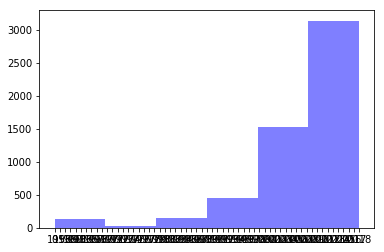

In [114]:
#Histogram for release year Data
plt.hist(completeAnimeList_df.ReleaseYear, 6, facecolor='blue', alpha=0.5)

In [119]:
yearlist = completeAnimeList_df.ReleaseYear.unique()
a = 0
for year in  yearlist:
    a+= len(completeAnimeList_df[completeAnimeList_df.ReleaseYear == year])
    print(year, len(completeAnimeList_df[completeAnimeList_df.ReleaseYear == year]))

print(a)

2006 208
2007 198
2008 206
2003 146
2002 136
2011 244
2012 335
2009 242
2017 370
1999 92
2016 421
2014 412
2004 162
2018 172
1991 26
1976 1
2001 123
2013 352
1990 30
2015 384
1981 9
1997 51
2005 172
1993 36
2000 86
1992 32
1983 10
1994 53
2010 204
1988 25
1960 1
1971 2
1998 68
0 128
1989 39
1985 21
1961 1
1996 61
1995 58
1986 21
1970 1
1980 9
1969 1
1984 16
1987 20
1978 8
1968 2
1979 6
1975 4
1982 12
1958 1
1972 3
1965 1
1977 1
1973 1
1959 1
1974 1
1963 2
1967 1
5429
